In [20]:
import numpy as np
import pandas as pd

In [21]:
df = pd.read_csv('대구 인구_지하철 데이터.csv', header=None, encoding='cp949', dtype=str)
df.columns = ['구/군','동','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023','지하철역 개수']
df

,구/군,동,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,지하철역 개수
0,중구,동인동,"10,510","10,390","10,633","10,596","10,353","10,001","9,238","8,525","8,053","7,579","8,372",0
1,중구,삼덕동,"6,530","6,740","6,784","6,754","6,602","6,600","6,597","6,736","6,587","6,405","6,643",1
2,중구,"성내1,2동","9,915","9,759","9,589","9,407","9,427","9,458","9,261","9,252","9,029","9,315","10,533",3
3,중구,성내3동,"3,873","3,778","3,648","3,587","5,369","5,909","5,312","5,158","4,791","4,847","9,030",1
4,중구,대신동,"4,929","4,777","7,509","7,529","7,468","8,323","8,341","8,094","7,857","7,494","7,558",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,군위군,부계면,"2,063","2,056","2,046","2,034","1,982","1,989","2,042","2,042","2,011","2,093","2,094",0
110,군위군,우보면,"2,173","2,139","2,067","2,106","2,220","2,150","2,134","2,007","1,933","1,971","1,939",0
111,군위군,의흥면,"2,780","2,725","2,648","2,623","2,610","2,502","2,495","2,385","2,356","2,365","2,317",0
112,군위군,산성면,"1,298","1,312","1,262","1,258","1,275","1,269","1,250","1,189","1,182","1,211","1,188",0


## 지하철역 개수와 인구 증감률의 관계를 알아보자

In [22]:
# 데이터 전처리: 인구 수와 지하철역 개수를 정수로 변환
years = [str(year) for year in range(2013, 2024)]
df[years] = df[years].apply(lambda x: x.str.replace(',', '').astype(int))
df['지하철역 개수'] = df['지하철역 개수'].astype(int)

# 연도별 인구 증감률 계산
for year in range(2014, 2024):
    df[f'Growth_{year-1}_{year}'] = (df[str(year)] - df[str(year-1)]) / df[str(year-1)]

# 각 '동'의 평균 인구 증감률 계산
df['평균 인구 증감률'] = df[[f'Growth_{year-1}_{year}' for year in range(2014, 2024)]].mean(axis=1)

# '구/군', '동', '평균 인구 증감률','지하철역 개수' 칼럼을 포함한 DataFrame 출력
df[['구/군', '동', '평균 인구 증감률','지하철역 개수']]

,구/군,동,평균 인구 증감률,지하철역 개수
0,중구,동인동,-0.021151,0
1,중구,삼덕동,0.001948,1
2,중구,"성내1,2동",0.006981,3
3,중구,성내3동,0.119523,1
4,중구,대신동,0.055573,1
...,...,...,...,...
109,군위군,부계면,0.001656,0
110,군위군,우보면,-0.010824,0
111,군위군,의흥면,-0.017934,0
112,군위군,산성면,-0.008580,0


In [23]:
# IQR 기반 이상치 제거
Q1 = df['평균 인구 증감률'].quantile(0.25)
Q3 = df['평균 인구 증감률'].quantile(0.75)
IQR = Q3 - Q1

# 이상치가 아닌 데이터만 필터링
filtered_df = df[(df['평균 인구 증감률'] >= Q1 - 1.5 * IQR) & (df['평균 인구 증감률'] <= Q3 + 1.5 * IQR)]

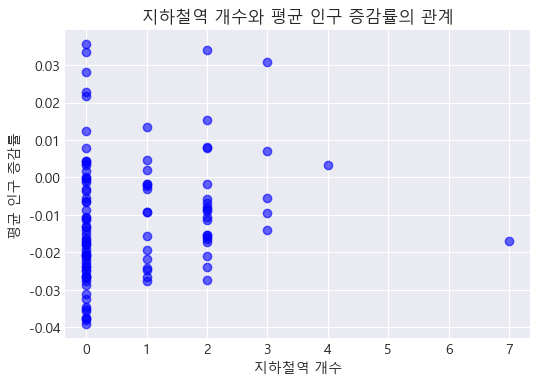

In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.figure(figsize=(6, 4))
plt.scatter(filtered_df['지하철역 개수'], filtered_df['평균 인구 증감률'], alpha=0.6, color='blue')
plt.title('지하철역 개수와 평균 인구 증감률의 관계')
plt.xlabel('지하철역 개수')
plt.ylabel('평균 인구 증감률')
plt.grid(True)
plt.show()

In [25]:
# 상관계수 계산
correlation = filtered_df[['지하철역 개수', '평균 인구 증감률']].corr(method='spearman')
correlation

,지하철역 개수,평균 인구 증감률
지하철역 개수,1.000000,0.219446
평균 인구 증감률,0.219446,1.000000


0.0 ~ 0.2: 거의 무시할 수 있는 상관관계 <br>
0.2 ~ 0.4: 약한 상관관계<br>
0.4 ~ 0.6: 중간 정도의 상관관계<br>
0.6 ~ 0.8: 강한 상관관계<br>
0.8 ~ 1.0: 매우 강한 상관관계<br>

###### 지하철역 개수와 인구 증감률은 약한 상관관계를 가진다. 즉, 지하철역의 개수는 인구 증감률에 큰 영향을 미치지 않는다.

## 지하철역 유무와 인구 증감률의 관계를 알아보자

In [26]:
# 지하철역 개수 컬럼을 정수형으로 변환
df['지하철역 개수'] = df['지하철역 개수'].astype(int)

# 지하철 유무 컬럼 생성: 지하철역 개수가 0이면 0, 1 이상이면 1
df['지하철 유무'] = (df['지하철역 개수'] > 0).astype(int)

# '구/군', '동', '평균 인구 증감률','지하철 유무' 칼럼을 포함한 DataFrame 출력
df[['구/군', '동', '평균 인구 증감률','지하철 유무']]

,구/군,동,평균 인구 증감률,지하철 유무
0,중구,동인동,-0.021151,0
1,중구,삼덕동,0.001948,1
2,중구,"성내1,2동",0.006981,1
3,중구,성내3동,0.119523,1
4,중구,대신동,0.055573,1
...,...,...,...,...
109,군위군,부계면,0.001656,0
110,군위군,우보면,-0.010824,0
111,군위군,의흥면,-0.017934,0
112,군위군,산성면,-0.008580,0


In [27]:
# IQR 기반 이상치 제거
Q1 = df['평균 인구 증감률'].quantile(0.25)
Q3 = df['평균 인구 증감률'].quantile(0.75)
IQR = Q3 - Q1

# 이상치가 아닌 데이터만 필터링
filtered_df = df[(df['평균 인구 증감률'] >= Q1 - 1.5 * IQR) & (df['평균 인구 증감률'] <= Q3 + 1.5 * IQR)]

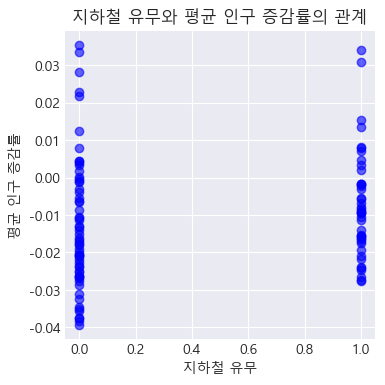

In [28]:
plt.figure(figsize=(4, 4))
plt.scatter(filtered_df['지하철 유무'], filtered_df['평균 인구 증감률'], alpha=0.6, color='blue')
plt.title('지하철 유무와 평균 인구 증감률의 관계')
plt.xlabel('지하철 유무')
plt.ylabel('평균 인구 증감률')
plt.grid(True)
plt.show()

In [29]:
# 상관계수 계산
correlation = filtered_df[['지하철 유무', '평균 인구 증감률']].corr(method='spearman')
correlation

,지하철 유무,평균 인구 증감률
지하철 유무,1.000000,0.197395
평균 인구 증감률,0.197395,1.000000


0.0 ~ 0.2: 거의 무시할 수 있는 상관관계 <br>
0.2 ~ 0.4: 약한 상관관계<br>
0.4 ~ 0.6: 중간 정도의 상관관계<br>
0.6 ~ 0.8: 강한 상관관계<br>
0.8 ~ 1.0: 매우 강한 상관관계<br>

###### 대구에서, 지하철 유무와 인구 증감률은 거의 무시할 수 있는 상관관계를 가진다. 즉, 지하철 유무는 인구 증감률과 별로 관련이 없다.
###### 대구의 지하철 교통은 인구와 큰 연관성이 없음을 알 수 있다. 사람들은 지하철보다 버스나 도보를 더 많이 이용할 수 있다. 그러면 교통에 한해서는, 지하철이 인구에 큰 영향을 미치지 않을 수 있다. 
###### 지방에서, 그 지역 내를 이동하는 지하철은 인구에 영향을 미치지 않음을 알 수 있다. 오히려, 주변의 더 큰 도시(ex서울)과 연결되는 지하철이 있는 경우 인구가 증가할 수 있다.
###### 추가 데이터 분석 : 대구 근처의 마을들 (ex경산)의 경우, 대구와 연결된 지하철이 있는 지역과 없는 지역을 비교해볼 수 있다. 